# Mérida, Venezuela, ROI#1

## Load *Streamlines* package

In [1]:
import streamlines

## Initiate *Streamlines* workflow

Choose the JSON parameters file we want to work with. The extension `.json` is automatically added.

In [2]:
JSON_parameters_file = 'Merida_ROI1'

Initialize streamline analysis.

In [3]:
sl = streamlines.run( parameters_file=JSON_parameters_file, \
                        do_geodata = False, \
                        do_preprocess = False, \
                        do_condition=True, \
                        do_trace = False, \
                        do_analysis=False, \
                        do_mapping=False, \
                        do_plot=False, \
                        do_display=True, \
                        do_save=False )


Thu 2018-12-13 10:41:32 JST+0900

**Initialization begin**
Loaded JSON parameters file "/Users/colinstark/Work/Streamlines/slm_app1/Merida_ROI1.json"
slm git:
[['commit dbf45629cc353bee2a227521b7fe6160b41c5ee6',
  'Author: Colin Stark',
  'Date:   Thu Sep 27 17:39:02 2018 +0900',
  '    Update nb, pdf']]
**Initialization end**



## Import DTM

In [4]:
sl.geodata.do()


**Geodata begin**
/Users/colinstark/Work/Streamlines/slm_app1
/Users/colinstark/Work/Streamlines/slm_data1 Merida
Reading DTM from GeoTIFF file "/Users/colinstark/Work/Streamlines/slm_data1/Merida/Merida_ROI1_res30m_filtercirc10_fillsinks0p5.tif"
(-7231.0884, 30.0, 0.0, 69301.2315, 0.0, -29.999999999999993)
DTM size: 803 x 1260 = 1,011,780 pixels
DTM pixel size: 30.0m
DTM origin:
  - bottom-left pixel center: [-7231.09mE, 31501.23mN]
  - bottom-left pixel corner: [-7246.09mE, 31486.23mN]
ROI pixel bounds:  [[0, 802], [0, 1259]]
ROI pixel grid:  803 x 1260 = 1,011,780 pixels
ROI pixel-edge boundaries (assuming pixel-as-area)
  - in pixel units: [x: 0.0<=>803.0] , [y: 0.0<=>1260.0]
  - in meters:      [x: 0.0<=>24090.0] , [y: 0.0<=>37800.0]
Reading basins from GeoTIFF file "/Users/colinstark/Work/Streamlines/slm_data1/Merida/Merida_ROI1_res30m_filtercirc10_fillsinks0p5_basins.tif"
(-7231.0884, 30.0, 0.0, 69301.2315, 0.0, -29.999999999999993)
Mask out all but basin numbers [251]
**Geodat

ERROR 1: NUMPY driver was compiled against GDAL 2.2, but the current library version is 2.3


Recording figure "roi_shaded_relief"


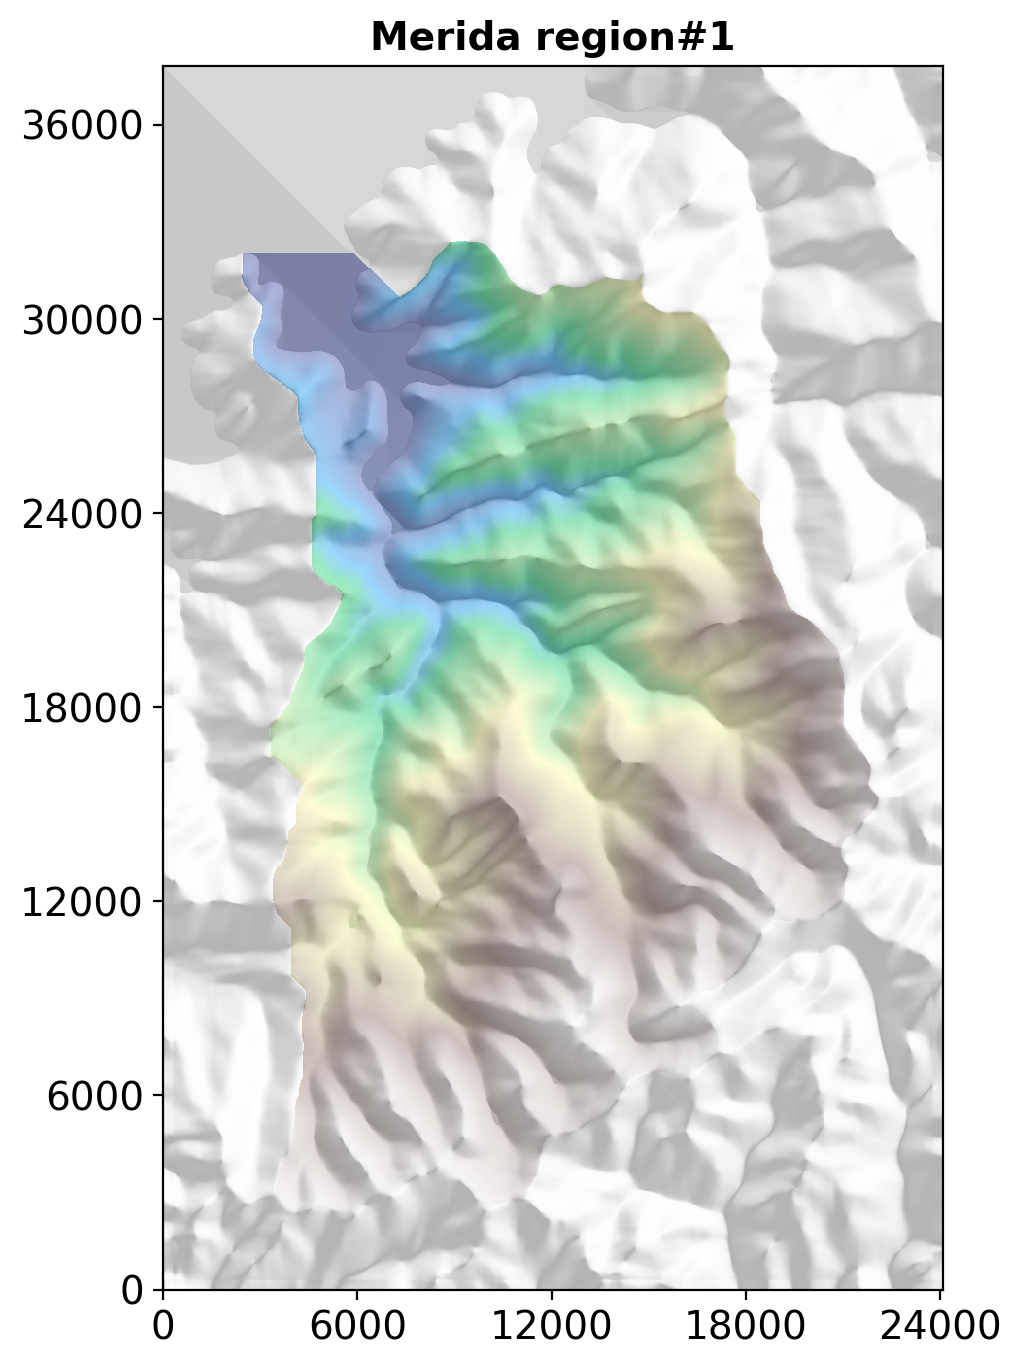

In [5]:
sl.plot.plot_roi_shaded_relief(interp_method='none')

## Preprocess DTM (fix loops etc)

In [6]:
%time sl.preprocess.do()


**Preprocess begin**
Precondition gradient vector field by fixing loops & blockages
Finding blockages...found 9...done
Finding and fixing loops...
...done
Fixing blockages...
...done
Mask out bad uv pixels...done
**Preprocess end**

CPU times: user 5.55 s, sys: 142 ms, total: 5.7 s
Wall time: 5.74 s


## Trace streamlines

In [7]:
%autosave 0
%time sl.trace.do()
%autosave 120

Autosave disabled

**Trace begin**
Integrating trajectories...
Generating seed points...shuffling...padding for 32 CL work items/group: 1000->1024...done
GPU/OpenCL device global memory limit for streamline trajectories: 3.6GB
GPU/OpenCL device memory required for streamline trajectories: 4MB => no need to chunkify
Total number of kernel instances: 1,024
Number of chunks = seed point array divisor: 1
Chunk size = number of kernel instances per chunk: 1,024
Downstream: downup=0 sgn(uv)=+1.0 chunk=0 seeds: 0+1000 => 1000
Seed point buffer size = 1000.0*8 bytes
0.0% 62.5% 100.0% 
Upstream:   downup=1 sgn(uv)=-1.0 chunk=0 seeds: 0+1000 => 1000
Seed point buffer size = 1000.0*8 bytes
0.0% 62.5% 100.0% 
Building streamlines compressed array
Streamlines actual array allocation:  size=154kB
Computing streamlines statistics
   downstream                             upstream                        
          min         mean          max        min        mean         max
l   20.722071  1004.875

Autosaving every 120 seconds


In [8]:
import pandas as pd
ddf=pd.DataFrame(sl.trace.traj_stats_df.loc['downstream'].T)
udf=pd.DataFrame(sl.trace.traj_stats_df.loc['upstream'].T)
ddf.style.format("{:.3g}").set_properties(**{'font-size':'140%'})\
    .set_caption('Downstreamline statistics:')
udf.style.format("{:.3g}").set_properties(**{'font-size':'140%'})\
    .set_caption('Upstreamline statistics:')

Autosave disabled
Plotting all 1,000 down streamlines
Progress: 1%...2%...3%...4%...5%...6%...7%...8%...9%...10%...11%...12%...13%...14%...15%...16%...17%...18%...19%...20%...21%...22%...23%...24%...25%...26%...27%...28%...29%...30%...31%...32%...33%...34%...35%...36%...37%...38%...39%...40%...41%...42%...43%...44%...45%...46%...47%...48%...49%...50%...51%...52%...53%...54%...55%...56%...57%...58%...59%...60%...61%...62%...63%...64%...65%...66%...67%...68%...69%...70%...71%...72%...73%...74%...75%...76%...77%...78%...79%...80%...81%...82%...83%...84%...85%...86%...87%...88%...89%...90%...91%...92%...93%...94%...95%...96%...97%...98%...99%...100%
Plotting all 1,000 up streamlines
Progress: 1%...2%...3%...4%...5%...6%...7%...8%...9%...10%...11%...12%...13%...14%...15%...16%...17%...18%...19%...20%...21%...22%...23%...24%...25%...26%...27%...28%...29%...30%...31%...32%...33%...34%...35%...36%...37%...38%...39%...40%...41%...42%...43%...44%...45%...46%...47%...48%...49%...50%...51%...52%..

Autosaving every 120 seconds


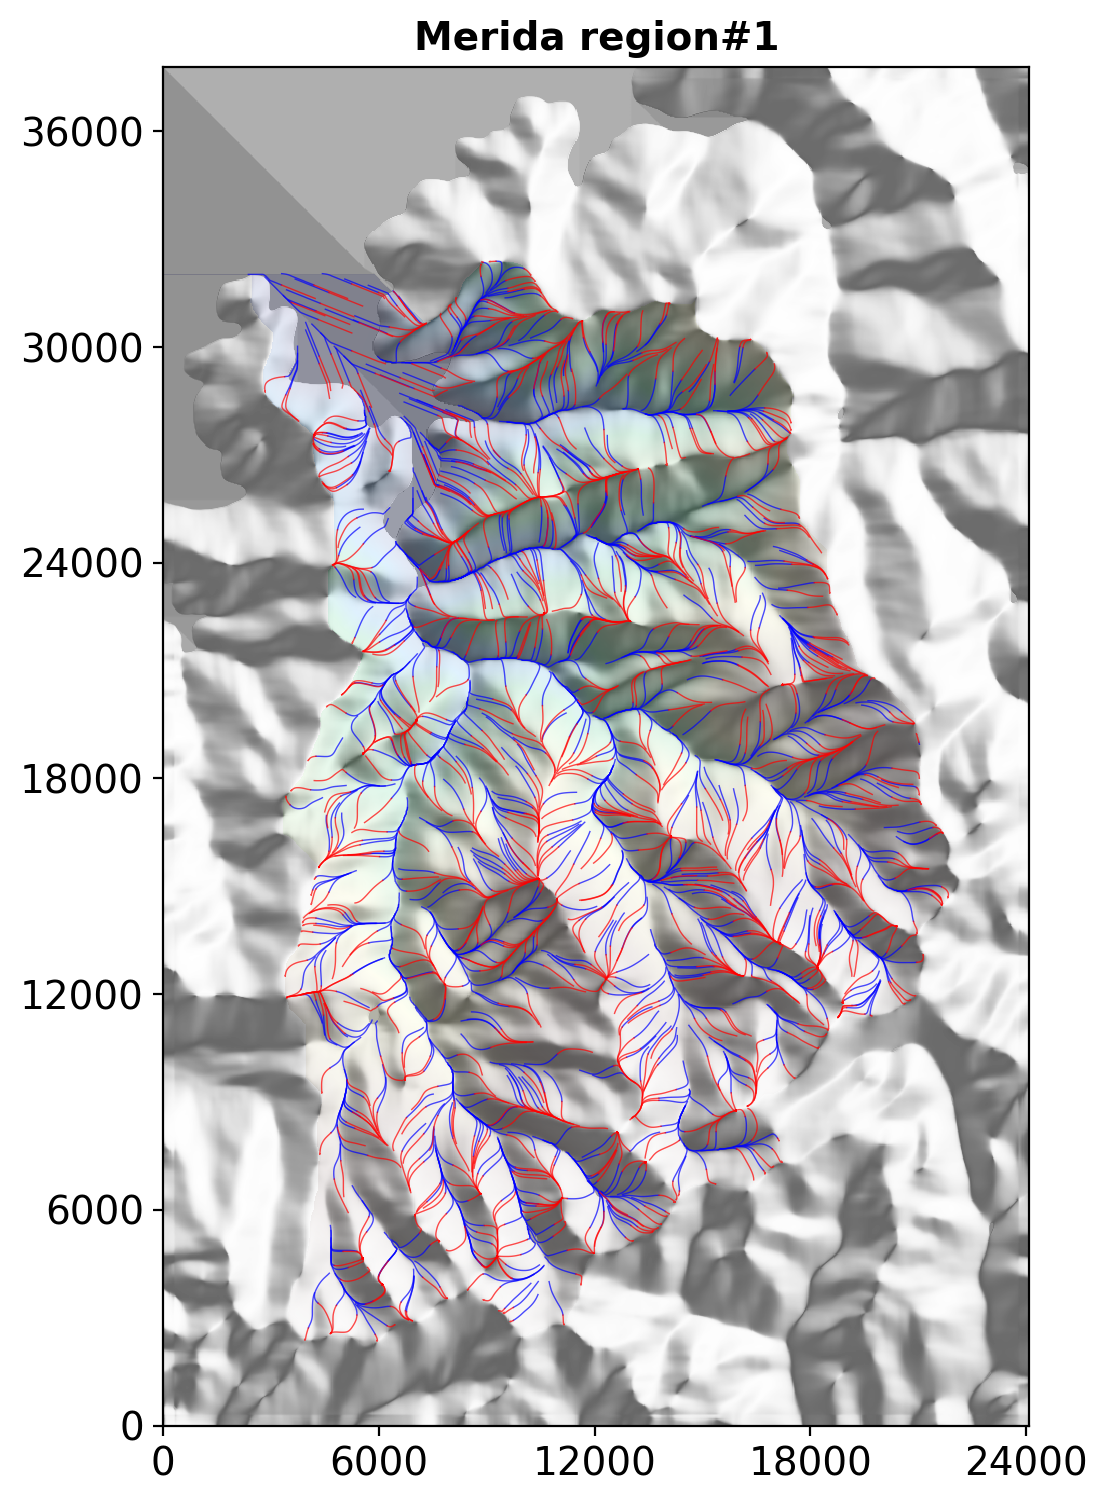

In [9]:
%autosave 0
sl.plot.plot_streamlines(window_size_factor=3)
%autosave 120

## Viz streamline flow concentrations

Recording figure "dsla"
Recording figure "dslt"


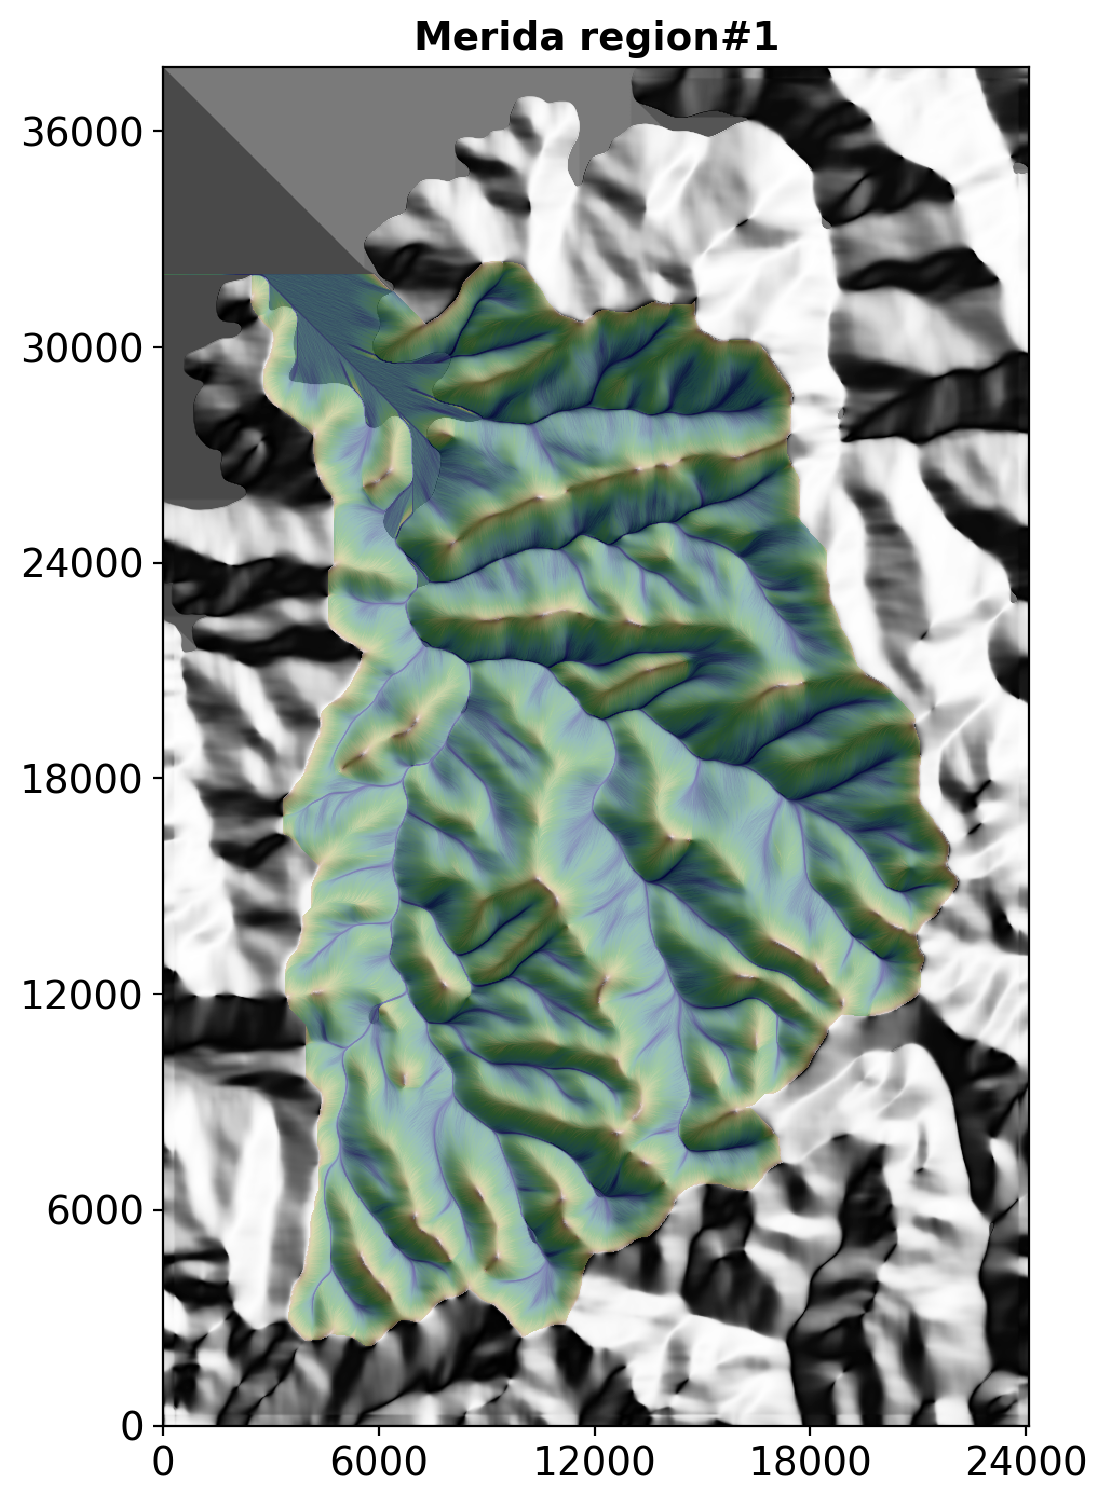

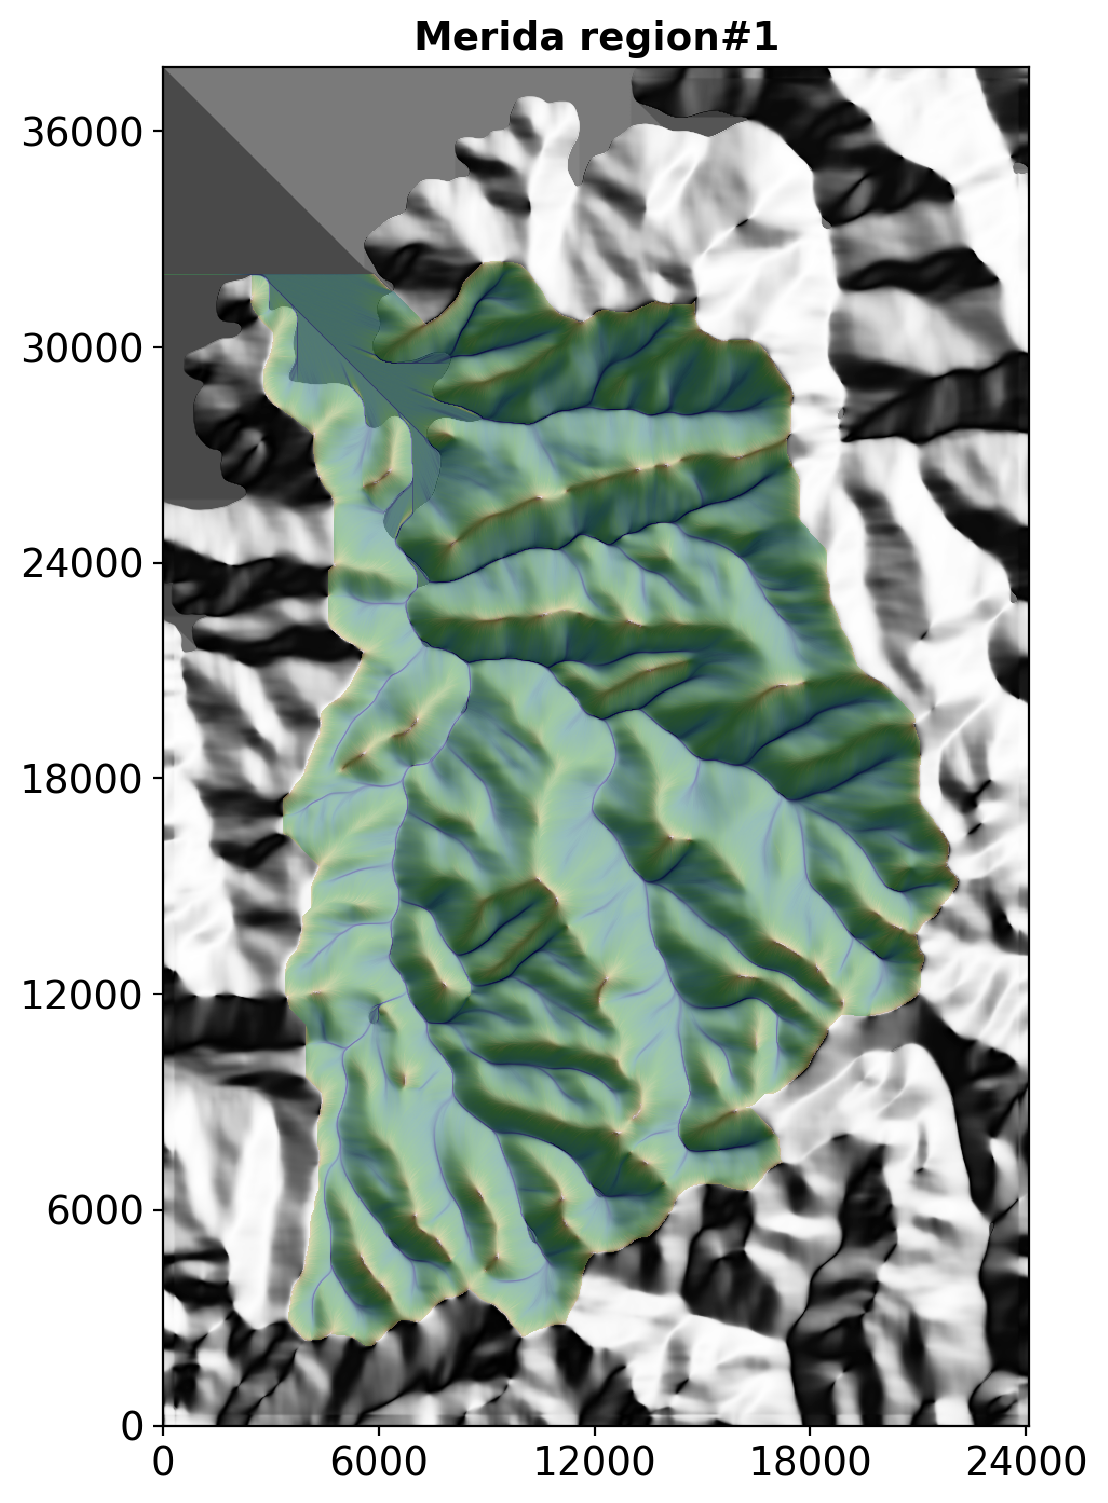

In [10]:
sl.plot.plot_flow_maps(window_size_factor=3)

## Analyze streamline distributions

In [11]:
# sl.analysis.do()

In [12]:
# sl.plot.plot_distributions()

## Map channels, segments & hillslope lengths

In [13]:
sl.analysis.search_cdf_min=0.9
sl.analysis.search_cdf_max=1

In [14]:
sl.mapping.coarse_segmentation_threshold=100
sl.mapping.coarse_channel_threshold=100
sl.mapping.do_skip_hsl = False
sl.mapping.pass1()


**Pass#1 begin**
Channels...done
Connecting channel pixels...
...done
Thinning channels...skeletonizing...done
Mapping channel heads...
...done
Counting down channels...
...done
Flagging down channels...
...done
Labeling confluences...
...done
Flagging down channels...
...done
Flagging down channels...
...done
Flagging down channels...
...done
Segmenting channels...number of segments=121
...done
Linking hillslopes...
...done
Segmenting hillslopes...
...done
Subsegmenting left & right flanks...number of subsegments=242
...done
Prepare for mapping HSL from midslopes
Midslopes...done
Ridges...done
**Pass#1 end**


In [15]:
# sl.mapping.pass2()

In [16]:
# sl.mapping.pass3()

## Viz channels & segments

Recording figure "channels"


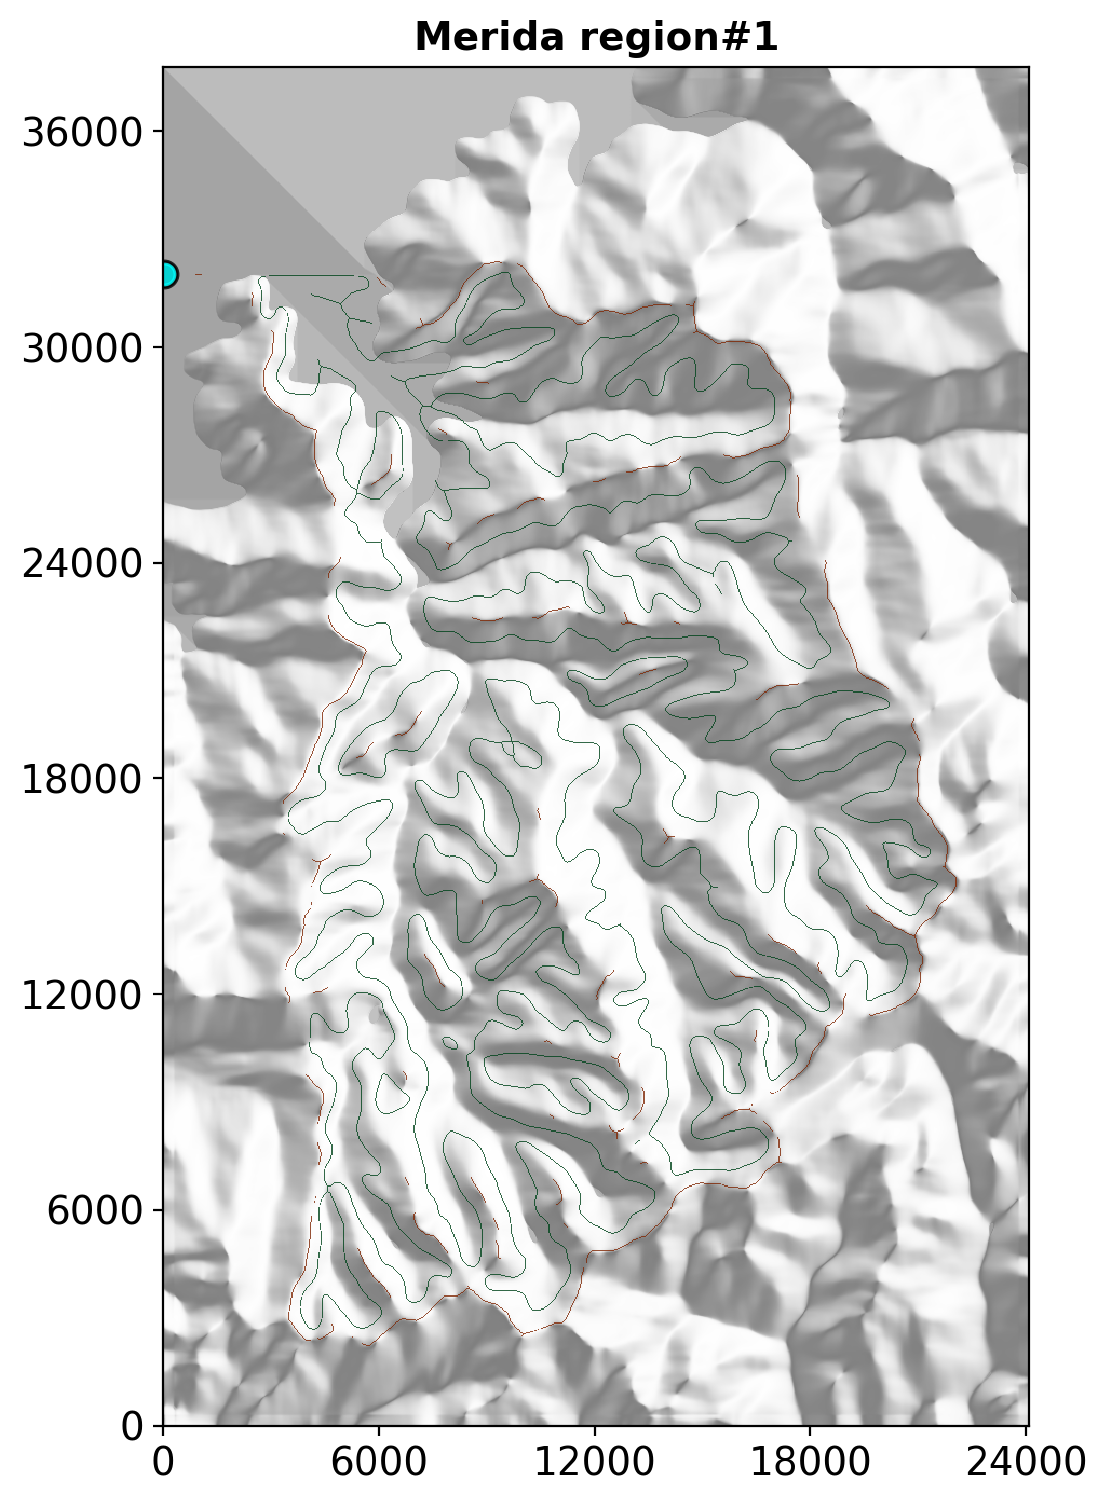

In [17]:
sl.plot.plot_channels(window_size_factor=3)
# sl.plot.plot_segments(window_size_factor=3)

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
sl.mapping.midslope_array \
    = (sl.mapping.mapping_array 
       & sl.mapping.info.is_midslope).copy().astype(np.bool)

h_midline_pts \
    = sl.geodata.roi_array[sl.mapping.midslope_array[2:-2,2:-2]].ravel()
h_all_pts = sl.geodata.roi_array[~np.isnan(sl.geodata.roi_array)].ravel()

In [25]:
from scipy import stats
fig = plt.figure()
fig.set_size_inches(7,5)
fig.set_dpi(100)
mpl.rc( 'font', size=12, family='Arial')
h_midline_pdf = stats.gaussian_kde(h_midline_pts, bw_method='scott')
h_all_pdf = stats.gaussian_kde(h_all_pts, bw_method='scott')
# h_array = np.linspace(0,6000,200)
# h_midline_pdf.set_bandwidth(0.04)
# h_all_pdf.set_bandwidth(0.04)
h_array = np.linspace(3000,4800,100)
h_midline_pdf.set_bandwidth(0.04)
h_all_pdf.set_bandwidth(0.04)
h_midline_pdf_array = h_midline_pdf.evaluate(points=h_array)
h_all_pdf_array = h_all_pdf.evaluate(points=h_array)
sf = np.max(h_midline_pdf_array)
h_midline_pdf_max = np.max(h_midline_pdf_array[h_array>3200])
h_midline_pdf_max_h = h_array[h_midline_pdf_array==h_midline_pdf_max]

<Figure size 700x500 with 0 Axes>

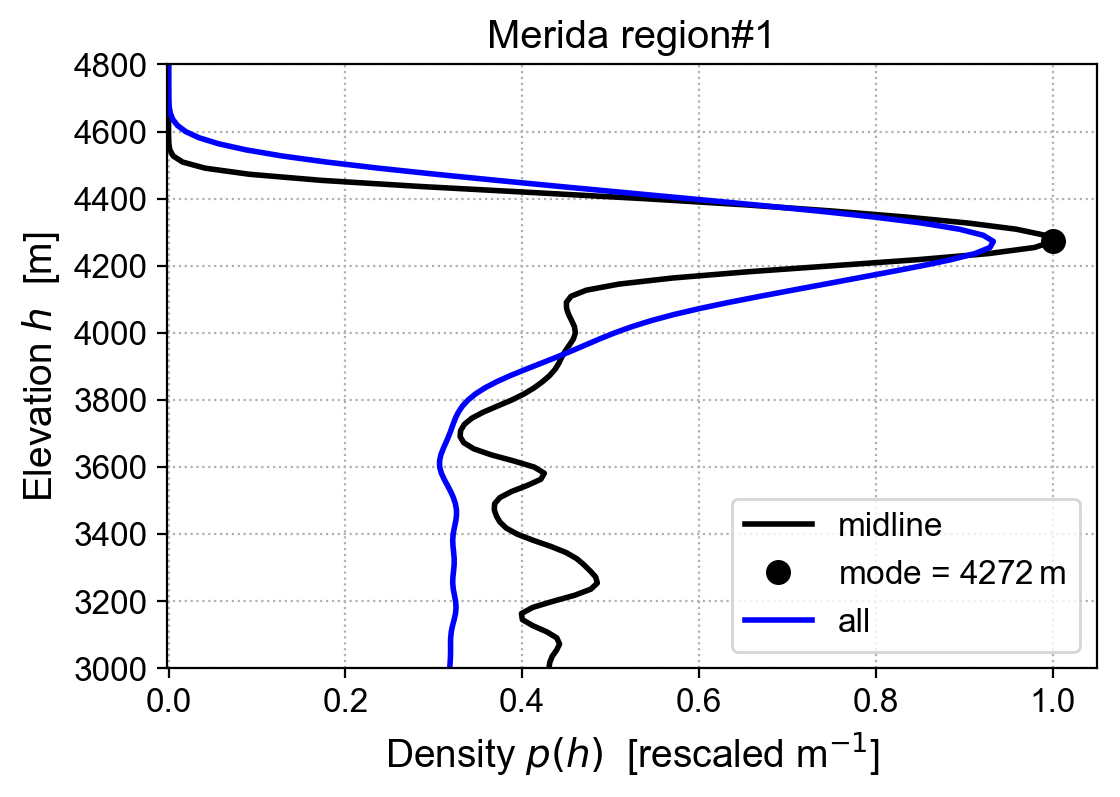

In [26]:
plt.plot(h_midline_pdf_array/sf, h_array,label='midline', c='k')
plt.plot(h_midline_pdf_max/sf, h_midline_pdf_max_h, 'o', c='k', ms=8,
         label='mode = {:4}$\,$m'.format(np.int(h_midline_pdf_max_h))  )
plt.plot(h_all_pdf_array/sf, h_array,label='all', c='b')
plt.autoscale(enable=True, tight=True, axis='y')
plt.xlim(-0.002,)
plt.grid('on',ls=':')
plt.legend()
plt.title(sl.geodata.title)
plt.ylabel('Elevation $h$  [m]')
plt.xlabel('Density $p(h)$  [rescaled m$^{-1}$]');

## Export plots

In [21]:
sl.plot.figs

{'roi_shaded_relief': <Figure size 810x810 with 1 Axes>,
 'streamlines': <Figure size 900x900 with 1 Axes>,
 'dsla': <Figure size 900x900 with 1 Axes>,
 'dslt': <Figure size 900x900 with 1 Axes>,
 'channels': <Figure size 900x900 with 1 Axes>}

In [22]:
sl.save.do()


**Write results to files begin**
Saving maps...
<class 'tuple'>
/Users/colinstark/Work/Streamlines/slm_app1/Merida/Merida_ROI1_dtm_mask.tif (807, 1264)
/Users/colinstark/Work/Streamlines/slm_app1/Merida/Merida_ROI1_basin_mask.tif (807, 1264)
/Users/colinstark/Work/Streamlines/slm_app1/Merida/Merida_ROI1_uv.tif (807, 1264, 2)
/Users/colinstark/Work/Streamlines/slm_app1/Merida/Merida_ROI1_slope.tif (807, 1264)
/Users/colinstark/Work/Streamlines/slm_app1/Merida/Merida_ROI1_mapping.tif (807, 1264)
/Users/colinstark/Work/Streamlines/slm_app1/Merida/Merida_ROI1_coarse_subsegment.tif (807, 1264)
/Users/colinstark/Work/Streamlines/slm_app1/Merida/Merida_ROI1_merged_coarse_mask.tif (807, 1264)
/Users/colinstark/Work/Streamlines/slm_app1/Merida/Merida_ROI1_midslope.tif (807, 1264)
...done
Saving figs...
('roi_shaded_relief', <Figure size 810x810 with 1 Axes>)
Writing <roi_shaded_relief> to "/Users/colinstark/Work/Streamlines/slm_app1/Merida/Merida_ROI1_roi_shaded_relief.pdf"
('streamlines', <Fi